In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Outlier detection and removal technique


**detection** by distplot and boxplot

**removal technique**


1.   z_score treatment == mean+_3s.d
2.   iqr based ==q1+1.5iqr
3.    percentile


in that two mwthod each


1.  **trimming** == removal of outlier

2.  **capping**  menas convert outlier into max & and min





In [ ]:
df=pd.read_csv('/content/placement1.csv')

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='cgpa', ylabel='Density'>

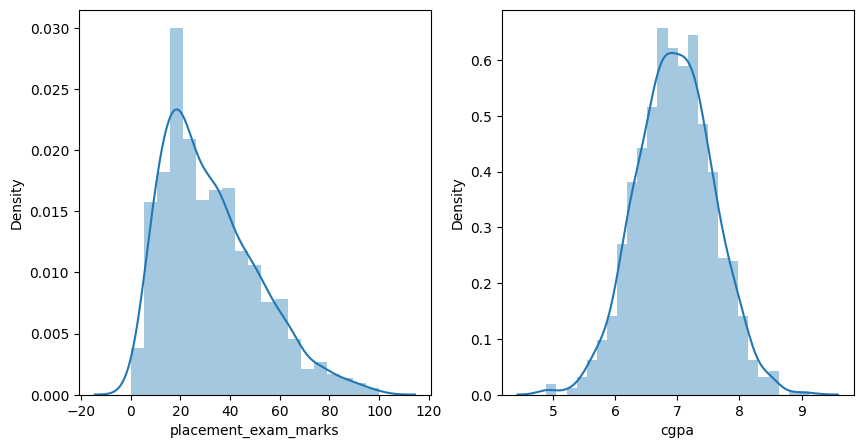

In [ ]:
# check outlier are present or not
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(1,2,2)
sns.distplot(df['cgpa'])



In [ ]:
# we applier z score to only normally or closed to normal
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961240
std,0.615898
min,4.890000
25%,6.550000
50%,6.960000
75%,7.370000
max,9.120000


In [ ]:
mean=df['cgpa'].mean()
std=df['cgpa'].std()
min=df['cgpa'].min()
max=df['cgpa'].max()

In [ ]:
# finding boundary value
min_threshold=mean-3*std
max_threshold=mean+3*std

In [ ]:
min_threshold,max_threshold

(np.float64(5.113546374602832), np.float64(8.808933625397168))

In [ ]:
# finding the outlier
df[(df['cgpa']>max_threshold) | (df['cgpa']<min_threshold)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


trimming

In [ ]:
new_df=df[(df['cgpa']<max_threshold) & (df['cgpa']>min_threshold)]
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
df.shape

(1000, 3)

In [ ]:
new_df.shape

(995, 3)

In [ ]:
# 2nd approch x=x-mean/s.d
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:
# find greater than 3 and smal than -3
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [ ]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
df[(df['cgpa_zscore']>3) | (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
# remove
new_df=df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)]

In [ ]:
new_df.shape

(995, 4)

capping

In [ ]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
upper_limit,lower_limit

(np.float64(8.808933625397168), np.float64(5.113546374602832))

<Axes: ylabel='cgpa'>

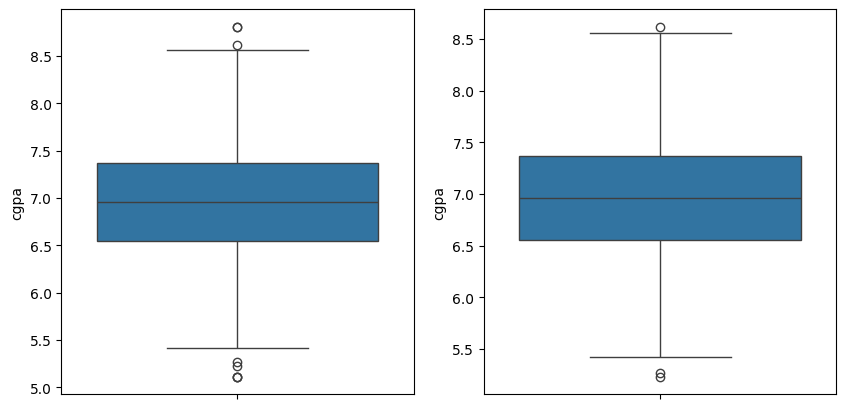

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])

plt.subplot(1,2,2)
sns.boxplot(new_df['cgpa'])

In [ ]:
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [ ]:
df.shape

(1000, 4)

In [ ]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
